<a href="https://colab.research.google.com/github/fedebaldasso/Data-Science/blob/main/Idea%2BBaldasso_F%2BMultivariado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importamos las librerias
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as image 
import seaborn as sns
import pandas as pd
import datetime as dt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import ipywidgets as widgets #librearia para interaccion del usuario con los graficos


cols = list(pd.read_csv('ds_salaries.csv', nrows =1))
df_sal = pd.read_csv('ds_salaries.csv')
del df_sal['Unnamed: 0']
df_sal.head()



,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


Descripción de variables

**work_year:**	El año en que se pagó el salario.
**experience_level:**	El nivel de experiencia en el puesto durante el año con los siguientes valores posibles: EN Entry-level/Junior MI Mid-level/Intermediate SE Senior-level/Experto EX Executive-level
**employment_type:**	El tipo de empleo para el puesto: PT Tiempo parcial FT Tiempo completo CT Contrato FL Freelance
**job_title:**	Rol trabajado durante el año.
**salary:**	El monto total del salario bruto pagado.
**salary_currency:**	La moneda del salario pagado como un código de moneda ISO 4217.
**salary in usd:**	El salario en USD (tasa de cambio dividida por la tasa promedio de USD para el año respectivo a través de fxdata.foorilla.com).
**employee_residence:**	El país de residencia principal del empleado durante el año laboral como código de país ISO 3166.
**remote_ratio:**	La cantidad total de trabajo realizado de forma remota, los valores posibles son los siguientes: 0 Sin trabajo remoto (menos del 20 %) 50 Parcialmente remoto 100 Totalmente remoto (más del 80 %)
**company_location:**	El país de la oficina principal del empleador o sucursal contratante como un código de país ISO 3166.
**company_size:**	Número promedio de personas que trabajaron para la empresa durante el año: S menos de 50 empleados (pequeño) M 50 a 250 empleados (mediano) L más de 250 empleados (grande)\

In [ ]:
df_sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


No encontramos valores nulos ni valores desconocidos 

In [ ]:
df_sal['work_year'] = pd.to_datetime(df_sal['work_year'], format='%Y').dt.year #Trabajo con las fechas en año solamente  

In [ ]:
df_sal.describe(include='all').T #Obtengo una descripcion completa del df

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
work_year,607.0,NaN,NaN,NaN,2021.405272,0.692133,2020.0,2021.0,2022.0,2022.0,2022.0
experience_level,607,4,SE,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employment_type,607,4,FT,588,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job_title,607,50,Data Scientist,143,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary,607.0,NaN,NaN,NaN,324000.062603,1544357.486636,4000.0,70000.0,115000.0,165000.0,30400000.0
salary_currency,607,17,USD,398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary_in_usd,607.0,NaN,NaN,NaN,112297.869852,70957.259411,2859.0,62726.0,101570.0,150000.0,600000.0
employee_residence,607,57,US,332,NaN,NaN,NaN,NaN,NaN,NaN,NaN
remote_ratio,607.0,NaN,NaN,NaN,70.92257,40.70913,0.0,50.0,100.0,100.0,100.0
company_location,607,50,US,355,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_sal.work_year.value_counts()

2022    318
2021    217
2020     72
Name: work_year, dtype: int64

In [ ]:
#variables numericas 
num_columns = df_sal.select_dtypes(include = ["number"]).columns
#variables categoricas 
cat_columns = df_sal.select_dtypes(include = ["object"]).columns

In [ ]:
num_columns

Index(['work_year', 'salary', 'salary_in_usd', 'remote_ratio'], dtype='object')

In [ ]:
cat_columns

Index(['experience_level', 'employment_type', 'job_title', 'salary_currency',
       'employee_residence', 'company_location', 'company_size'],
      dtype='object')

## Grafico de distribucion de variables

Como se pueden distribuir las variables?

Text(0.5, 1.01, 'Graficos de dispersion de salarios para data science')

<Figure size 1440x1440 with 0 Axes>

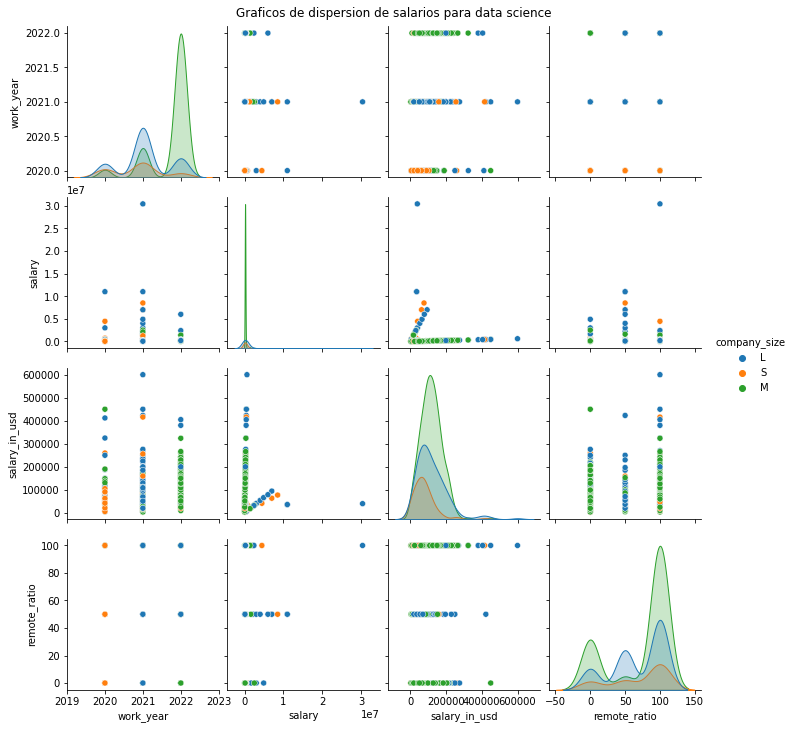

In [ ]:
#config generica
plt.figure(figsize=(20, 20))
g = sns.pairplot(df_sal, hue='company_size')
g.fig.suptitle("Graficos de dispersion de salarios para data science", y=1.01)

# **Observaciones**

*Salario en usd esta muy acumulado hacia la izquieda quizas con un log podria corregir hacia una distribucion mas normal.
*Se puede observar que la compañia mas grande L paga los salarios mas altos y en el 2021 pagó el salario mas alto registrado. Tambien paga los sueldos mas altos cuanto mayor trabajo remoto hagan.
*En 2022 los salarios son mas altos en cuanto al trabajo remoto y las compañias mas grandes (L) son las que mas pagan nuevamente


In [ ]:
df_sal['experience_level'].unique() #Obtengo los valores unicos de los niveles de experiencia 

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

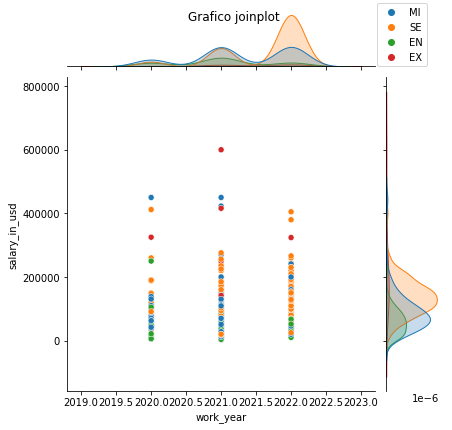

In [ ]:
#EN Entry-level
#Junior MI Mid-level
#Intermediate SE Senior-level
#Experto EX Executive-level

sns.jointplot
p = sns.jointplot(data=df_sal, x="work_year",y="salary_in_usd", hue='experience_level')
p.fig.suptitle("Grafico joinplot")
#año = df_sal['work_year']
#label_x = f'{año:.2f}'

#omito la legenda default
p.ax_joint.legend_._visible=False
p.fig.legend(bbox_to_anchor=(1, 1), loc=1)
#p.text(label_x, ha='center', va='center', fontsize=14)



**Conclusiones** 

*El salario mas alto registrado se da en el año 2021 para el cargo de Experto EX
*En el año 2022 los salarios mas altos estan encabezados en los cargos de Senior y de Experto, mayormente para Senior.
*Los sueldos mas bajos estan destinados para los cargos de menor nivel


In [ ]:
#fig = plt.figure(figsize = (10,10))
#sns.distplot(x = df_sal.remote_ratio,label = "Remote Ratio" )
#sns.distplot(x = df_sal.remote_ratio,label = "work_year" )
#fig.legend();

In [ ]:
import plotly.express as px

#grafico 3D 
fig = px.scatter_3d(df_sal, x='work_year', y='salary_in_usd', z='remote_ratio', size='salary_in_usd',
              color='company_size', opacity=0.8)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  title={
        'text': "Grafico 3D de variables",
        'y':0.9,
        'x':0.05
         })
fig.show()

**Conclusiones**

*En cuanto a la cantida de trabajo totalmente remoto es mayor para las empresas medianas M lo que conlleva a salarios mas altos 
*La cantidad de trabajos de manera totalmente remota es mayor para el año 2022 en general
*A mayor cantidad de trabajo remoto mayor salario 
*Para el año 2022 las empresas mas grandes (L) el trabajo remoto predominante es del 50% (Parcialmente remoto), El totalmente remoto para las empresas medianas (M) y los mayores casos de trabajo remoto en las empresas mas chicas se presenta en la modalidad totalmente remota (100)


In [ ]:
import plotly.express as px

#grafico 3D 
#Se utilza el mismo grafico 3D pero esta vez contemplando la variable de experience_level
fig = px.scatter_3d(df_sal, x='work_year', y='salary_in_usd', z='remote_ratio', size='salary_in_usd',
              color='experience_level', opacity=0.8)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  title={
        'text': "Segundo Grafico 3D de variables",
        'y':0.9,
        'x':0.05
         })
fig.show()

**Conclusiones**

*Se observa una mayor cantidad de trabajo totalmente remoto en el 2022 para la posicion de SE, EN, MI y EX.
Lo que se puede apreciar tambien con los filtros aplicados abajo
 


In [ ]:
#EN Entry-level
#Junior MI Mid-level
#Intermediate SE Senior-level
#Experto EX Executive-level

r1bajo2022 = ((df_sal['work_year'] == 2022)&(df_sal['remote_ratio'] == 0)&(df_sal['experience_level'] == 'EN')).sum()
r1medio2022 = ((df_sal['work_year'] == 2022)&(df_sal['remote_ratio'] == 50)&(df_sal['experience_level'] == 'EN')).sum()
r1alto2022 = ((df_sal['work_year'] == 2022)&(df_sal['remote_ratio'] == 100)&(df_sal['experience_level'] == 'EN')).sum()
r2bajo2022 = ((df_sal['work_year'] == 2022)&(df_sal['remote_ratio'] == 0)&(df_sal['experience_level'] == 'MI')).sum()
r2medio2022 = ((df_sal['work_year'] == 2022)&(df_sal['remote_ratio'] == 50)&(df_sal['experience_level'] == 'MI')).sum()
r2alto2022 = ((df_sal['work_year'] == 2022)&(df_sal['remote_ratio'] == 100)&(df_sal['experience_level'] == 'MI')).sum()
r3bajo2022 = ((df_sal['work_year'] == 2022)&(df_sal['remote_ratio'] == 0)&(df_sal['experience_level'] == 'SE')).sum()
r3medio2022 = ((df_sal['work_year'] == 2022)&(df_sal['remote_ratio'] == 50)&(df_sal['experience_level'] == 'SE')).sum()
r3alto2022 = ((df_sal['work_year'] == 2022)&(df_sal['remote_ratio'] == 100)&(df_sal['experience_level'] == 'SE')).sum()
r4bajo2022 = ((df_sal['work_year'] == 2022)&(df_sal['remote_ratio'] == 0)&(df_sal['experience_level'] == 'EX')).sum()
r4medio2022 = ((df_sal['work_year'] == 2022)&(df_sal['remote_ratio'] == 50)&(df_sal['experience_level'] == 'EX')).sum()
r4alto2022 = ((df_sal['work_year'] == 2022)&(df_sal['remote_ratio'] == 100)&(df_sal['experience_level'] == 'EX')).sum()

In [ ]:
def year_remoto_experience (remote_ratio, experience_level):
  r1bajo2022 = ((df_sal['work_year'] == 2022)&(df_sal['remote_ratio'] == remote_ratio)&(df_sal['experience_level'] == experience_level)).sum()
  print('La cantidad de trabajo de manera no remota para',experience_level,' es de ', r1bajo2022)

In [ ]:
print('La cantidad de trabajo de manera no remota para EN es de ', r1bajo2022) 
print('La cantidad de trabajo de manera parcialmente remota para EN es de ', r1medio2022) 
print('La cantidad de trabajo de manera totalmente remota para EN es de ', r1alto2022) 
print('La cantidad de trabajo de manera no remota para MI es de ', r3bajo2022) 
print('La cantidad de trabajo de manera parcialmente remota para MI es de ', r3medio2022) 
print('La cantidad de trabajo de manera totalmente remota para MI es de ', r3alto2022) 
print('La cantidad de trabajo de manera no remota para SE es de ', r2bajo2022) 
print('La cantidad de trabajo de manera parcialmente remota para SE es de ', r2medio2022) 
print('La cantidad de trabajo de manera totalmente remota para SE es de ', r2alto2022) 
print('La cantidad de trabajo de manera no remota para EX es de ', r4bajo2022) 
print('La cantidad de trabajo de manera parcialmente remota para EX es de ', r4medio2022) 
print('La cantidad de trabajo de manera totalmente remota para EX es de ', r4alto2022) 

La cantidad de trabajo de manera no remota para EN es de  4
La cantidad de trabajo de manera parcialmente remota para EN es de  3
La cantidad de trabajo de manera totalmente remota para EN es de  14
La cantidad de trabajo de manera no remota para MI es de  41
La cantidad de trabajo de manera parcialmente remota para MI es de  2
La cantidad de trabajo de manera totalmente remota para MI es de  150
La cantidad de trabajo de manera no remota para SE es de  33
La cantidad de trabajo de manera parcialmente remota para SE es de  5
La cantidad de trabajo de manera totalmente remota para SE es de  53
La cantidad de trabajo de manera no remota para EX es de  0
La cantidad de trabajo de manera parcialmente remota para EX es de  2
La cantidad de trabajo de manera totalmente remota para EX es de  11
